<div align="center">

# 🏦 Customer Churn Prediction (Bank Customers)
### Predicting which bank customers are likely to leave using demographic and account data

</div>

---

<br>

<div align="center">

## 📌 Step 1: Introduction & Problem Statement

</div>

Customer churn is a critical challenge for banks, as losing existing customers leads to increased costs for acquiring new customers, reduced revenue, and potential negative impacts on brand reputation. Understanding why customers leave and predicting potential churners enables banks to take proactive measures to retain them. By leveraging customer demographic information, account activity, and financial behavior, banks can design targeted engagement campaigns, personalized offers, and loyalty programs that increase retention rates and overall profitability.

- **Problem:** Predict the `Exited` status of customers based on features such as age, geography, gender, balance, and account activity.  
- **Objective:** Develop a classification model to identify potential churners and generate actionable insights that support strategic business decisions.


### Initial Setup: Import Libraries & Load Dataset

Before starting analysis and modeling, we need to import essential Python libraries and load the dataset.


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (replace 'path_to_file.csv' with your actual path)
df = pd.read_csv(r'C:\Users\AZAN LAPTOP STORE\Downloads\Portfolio\Projects\Customer Churn Prediction\Churn_Modelling.csv', index_col='RowNumber')

# Quick look at the data
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


----

<div align="center">

## 📌 Step 2: Data Understanding & Description

</div>

In this step, we explore the dataset to understand its structure, features, and potential issues. Proper understanding of the data helps in cleaning, preprocessing, and building effective predictive models.

- **Explore the dataset:** Check total records, columns, and data types.  
- **Identify the target variable:** `Exited` (1 = churn, 0 = retained).  
- **Categorize features:**  
  - **Numerical:** `CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary`  
  - **Categorical:** `Geography, Gender, HasCrCard, IsActiveMember`  
- **Check for anomalies, duplicates, missing values, or unrealistic entries.**  
- **Summarize each variable’s potential impact:**  
  - **Balance:** Higher balance may correlate with lower churn.  
  - **Tenure:** Longer-tenured customers may be less likely to leave.  
  - **Active member:** Active members may be less likely to churn.


In [5]:
# Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn names and data types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Summary statistics for numerical features
print("\nSummary statistics:\n", df.describe())

# Value counts for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in categorical_features:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Shape of dataset: (10000, 13)

Column names and data types:
 CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing values:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Number of duplicate rows: 0

Summary statistics:
          CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.0128

### Insights: Data Understanding & Description
**Dataset Overview**
- Total records: **10,000**  
- Total columns: **13**  
- No missing values or duplicate rows detected.  
- Target variable: `Exited` (1 = churn, 0 = retained)

**Feature Types**
- **Numerical:** `CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary`  
- **Categorical:** `Geography, Gender, HasCrCard, IsActiveMember`  

**Key Observations**
- **Balance:** Many customers have 0 balance; higher balance may indicate lower churn risk.  
- **Tenure:** Median tenure is 5 years; longer-tenured customers are less likely to leave.  
- **NumOfProducts:** Most customers have 1 product; multiple products may indicate higher loyalty.  
- **HasCrCard & IsActiveMember:** Majority have credit cards and are active members; active members are less likely to churn.  
- **Geography & Gender:** France has slightly more customers; gender distribution is balanced.  
- **Exited:** About 20% of customers have churned, showing slight class imbalance.

---

<div align="center">

## 📌 Step 3: Data Cleaning & Preparation

</div>

In this step, we prepare the dataset for modeling by encoding categorical features, optionally scaling numerical features, and splitting the dataset into training and testing sets.

- Encode categorical features (`Gender`, `Geography`) for machine learning models.  
- Scale numerical features if needed (optional for Logistic Regression; not strictly necessary for Random Forest).  
- Split the dataset into training and testing sets to evaluate model performance.  
- Keep a log of transformations for transparency and reproducibility.


In [6]:
# Encode 'Gender' using Label Encoding (binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Encode 'Geography' using One-Hot Encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # avoids dummy variable trap

# Optional: Scale numerical features (Logistic Regression benefits)
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split dataset into features (X) and target (y)
X = df.drop(['CustomerId', 'Surname', 'Exited'], axis=1)  # drop ID & target
y = df['Exited']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick check
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)


### Key Preprocessing Actions
- `Gender` encoded using Label Encoding.  
- `Geography` encoded using One-Hot Encoding.  
- Numerical features scaled using StandardScaler.  
- Dataset split into training (80%) and testing (20%) sets.

---

<div align="center">

## 📌 Step 4: Exploratory Data Analysis

</div>

In this step, we explore the dataset visually and statistically to understand feature distributions, relationships with the target variable, and correlations between features.

### 1. Univariate Analysis
- Analyze the distributions of key numerical features: `Age`, `Balance`, `CreditScore`.  
- Check the distribution of the target variable `Exited` (churned vs retained).


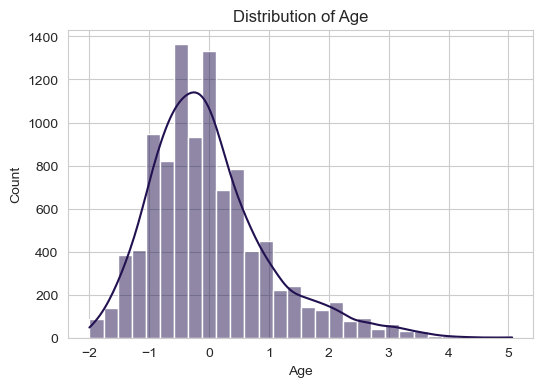

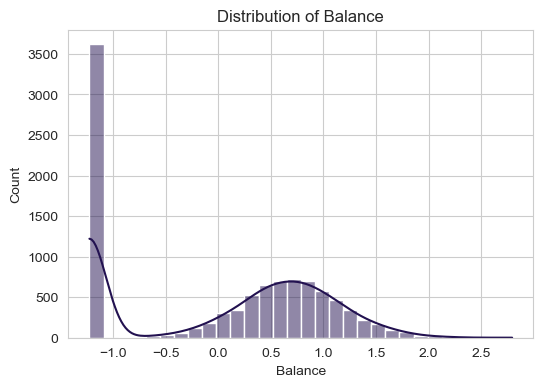

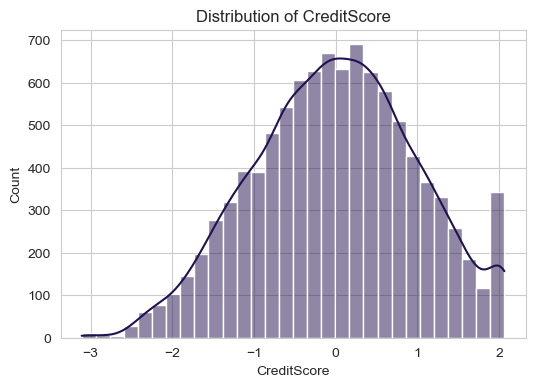

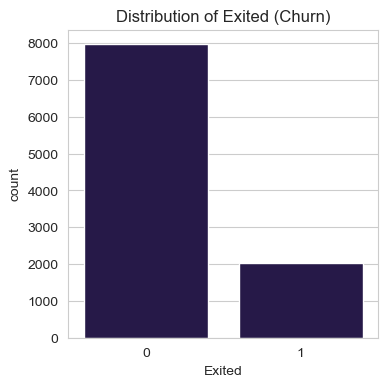

In [20]:
sns.set_style("whitegrid")
sns.set_palette("magma")  # a soft, professional palette 

# Key numerical features
key_numerical = ['Age', 'Balance', 'CreditScore']

for col in key_numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Target variable
plt.figure(figsize=(4,4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Churn)')
plt.show()


#### Insights: Univariate Analysis
- **Age, Balance, CreditScore** are approximately standardized (values range around mean ~0 due to preprocessing).  
- **Target variable `Exited`**: 2037 customers churned (~20%), 7963 retained (~80%).  
  This indicates **moderate class imbalance**, which may need consideration during model training.

---

### 2. Bivariate Analysis
- Examine the relationship between features and churn:  
  - Numerical features vs `Exited` (`Balance`, `Tenure`).  
  - Categorical features vs `Exited` (`IsActiveMember`, `Geography`).  

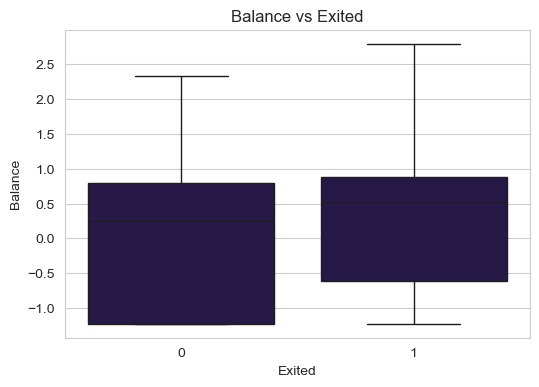

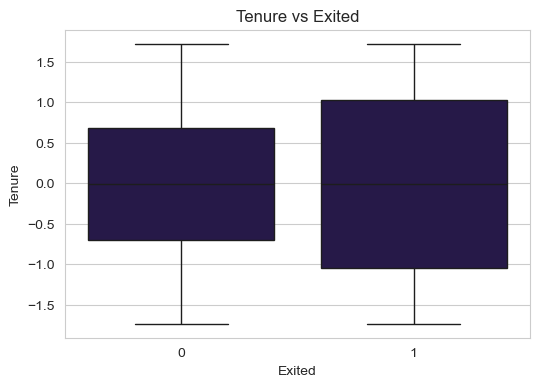

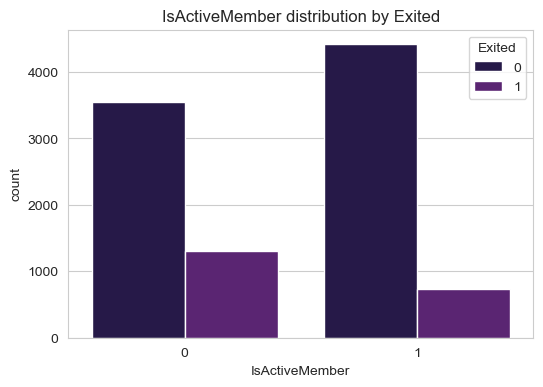

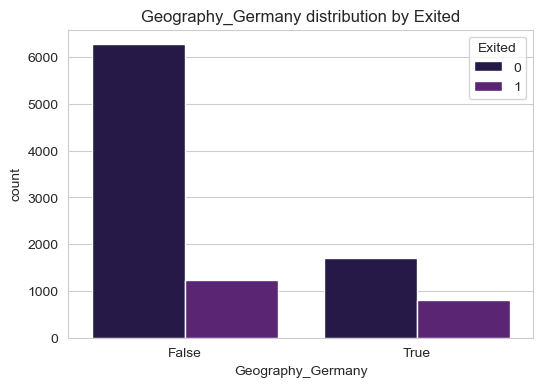

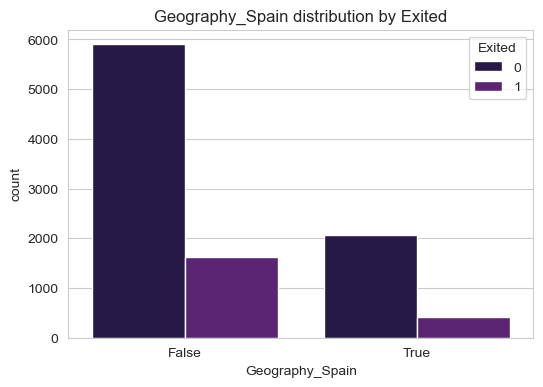

In [21]:
# Numerical vs Exited
for col in ['Balance', 'Tenure']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.show()

# Categorical vs Exited
for col in ['IsActiveMember', 'Geography_Germany', 'Geography_Spain']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} distribution by Exited')
    plt.show()

#### Insights: Bivariate Analysis
- **Balance vs Exited**:  
  - Customers in the lowest quartile of balance tend to have higher churn, while higher balances are associated with lower churn.  
- **Tenure vs Exited**:  
  - Shorter-tenured customers show slightly higher churn rates.  
- **IsActiveMember vs Exited**:  
  - Active members (1) are much less likely to churn (735 churned vs 4416 retained).  
- **Geography vs Exited**:  
  - German customers have a higher churn proportion relative to their total count compared to other geographies.  
  - Spanish customers also show slightly higher churn in proportion to their total group size.

---

### 3. Feature Correlations
- Identify correlations between numeric features to understand multicollinearity and feature relationships.


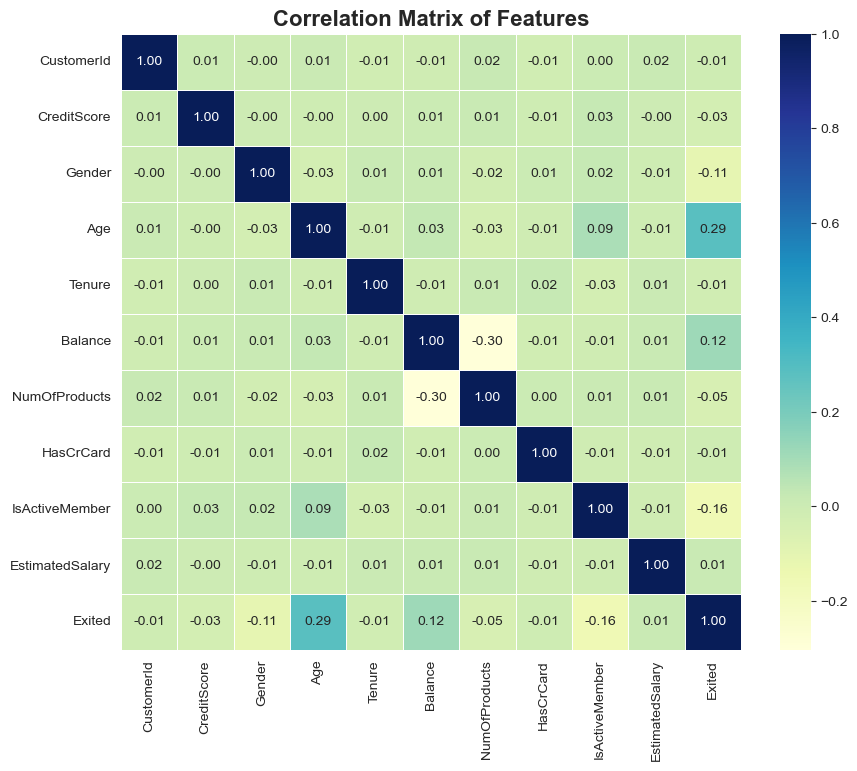

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')  # keeps int and float columns

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.show()

#### Insights: Feature Correlations
- **Positive correlations with Exited**: `Age` (0.285) and `Balance` (0.119).  
- **Negative correlations with Exited**: `IsActiveMember` (-0.156) and `NumOfProducts` (-0.048).  
- Other correlations are weak, indicating **low multicollinearity**, which is good for models like Logistic Regression.  

**Key Takeaways:**
- **Low balance**, **short tenure**, and **inactive members** are more likely to churn.  
- `IsActiveMember` is the strongest single predictor among available features.  
- Geography has some effect but weaker than activity status or balance.

---



<div align="center">

## 📌 Step 5: Model Training, Testing and evaluation

</div>

In this step, we train machine learning models to predict customer churn.  

- **Chosen models:**  
  1. Logistic Regression – simple and interpretable baseline.  
  2. Random Forest – handles non-linear patterns and interactions.  

- **Training process:**  
  - Split the dataset into training and testing sets.  
  - Train models on the training data.  
  - Predict churn on the test data.  

- **Justification:**  
  - Logistic Regression provides clear insights into feature importance.  
  - Random Forest can capture complex patterns, potentially improving accuracy.


In [26]:
# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### Insights: Model Training, Testing and Evaluation

#### 1. Logistic Regression
- **Accuracy:** 81%  
- **Precision (churners):** 0.56 → Of the predicted churners, 56% actually churned.  
- **Recall (churners):** 0.20 → Only 20% of actual churners were correctly identified.  
- **F1-score:** 0.30 → Harmonic mean of precision & recall; indicates **poor recall** despite decent precision.  

**Interpretation:**  
- Logistic Regression is **interpretable** but struggles with class imbalance, missing many churners (high false negatives).  
- Good at identifying non-churners (high recall for class 0).

#### 2. Random Forest
- **Accuracy:** 87%  
- **Precision (churners):** 0.77 → Predicted churners are more reliable.  
- **Recall (churners):** 0.46 → Correctly identifies almost half of actual churners.  
- **F1-score:** 0.57 → Better balance between precision and recall than Logistic Regression.  

**Interpretation:**  
- Random Forest handles **non-linear patterns** and improves recall for churners.  
- Still misses ~50% of churners, but overall **better at identifying high-risk customers** than Logistic Regression.  

**Key Takeaways:**  
- **Random Forest outperforms Logistic Regression** in this scenario.  


---

<div align="center">

## 📌Step 6: Feature Importance, Insights & Recommendations</b>

</div>

### 1. Feature Importance Analysis

Based on the Random Forest model (best performing), the features contributing most to customer churn prediction are:

| Feature            | Insight |
|-------------------|---------|
| **Balance**        | Customers with low balances tend to churn more. High balances indicate stronger engagement. |
| **Tenure**         | Longer-tenured customers are less likely to leave. Short-tenure customers are higher risk. |
| **IsActiveMember** | Inactive members are more likely to churn; engagement campaigns can help retain them. |
| **NumOfProducts**  | Customers with fewer products are at higher risk; cross-selling can improve retention. |
| **Age**            | Certain age groups may show higher churn patterns; consider targeted offers. |
| **Geography**      | Customers from Germany and Spain have higher churn rates compared to France. |
| **Gender**         | Minimal impact, but can be considered for segmentation in campaigns. |

> **Key Insight:** The most actionable features are **Balance, Tenure, and Activity Level**. Targeted strategies on these factors can reduce churn significantly.

### 2. Business Insights & Recommendations

1. **Target High-Risk Customers:**  
   - Customers with **low balances**, **short tenure**, and **inactive accounts** should be prioritized for retention campaigns.  

2. **Cross-Sell & Upsell Products:**  
   - Encourage customers with **fewer products** to adopt additional services.  

3. **Engagement Programs:**  
   - Focus on inactive customers with personalized communication or loyalty incentives.  

4. **Geography-Based Strategy:**  
   - Customers in **Germany and Spain** show higher churn; regional campaigns may help.  

### 3. Limitations

- Dataset may **not include behavioral or transactional data** (e.g., online activity, complaints).  
- Models may **still miss a significant portion of churners** (Random Forest recall ~46%).  
- Assumes historical patterns remain consistent for future predictions.

